## 📘 Step 1: Importing Libraries

Let's start by importing the essential Python libraries for data manipulation, visualization, and modeling. We'll also bring in some tools for text processing and evaluation.

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text preprocessing
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Model and evaluation
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Warnings
import warnings
warnings.filterwarnings('ignore')


## 📗 Step 2: Load the Dataset

Now we'll load our dataset. This dataset contains text samples labeled with their corresponding languages. We'll take a peek at the first few rows to get familiar with the structure.

In [17]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Language Detection.csv')

# Display the first few rows
df.head()


,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


## 📊 Step 3: Basic EDA

Before jumping into modeling, let's explore the data. We'll check for missing values, class distribution, and review some example texts.

In [3]:
# Check for missing values
df.isnull().sum()


,0
Text,0
Language,0


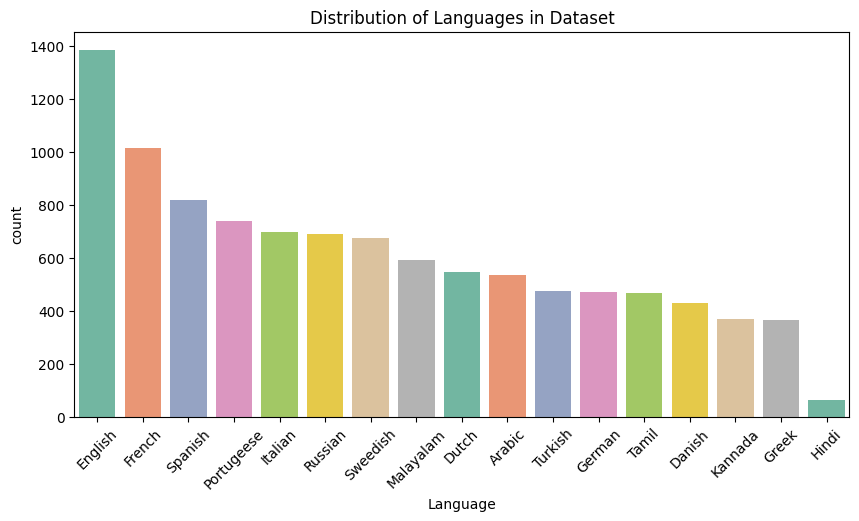

In [6]:
# Class distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Language', order=df['Language'].value_counts().index, palette='Set2')
plt.title("Distribution of Languages in Dataset")
plt.xticks(rotation=45)
plt.show()


In [8]:
# Sample examples from each language
df.groupby('Language').apply(lambda x: x.sample(1))[['Text', 'Language']]


,,Text,Language
Language,,,
Arabic,9267,شكرا على مجهودك.,Arabic
Danish,6896,"hvis noget overrasker dig, kan du også sige, a...",Danish
Dutch,4401,Gemiddeld bevatte een WP-artikel vier en een E...,Dutch
English,771,In cases where vast numbers of potential answe...,English
French,3254,Le mot nature est un terme polysémique (c’est-...,French
German,9734,Es ist tatsächlich 1 9 Uhr.,German
Greek,5662,Δεν υπάρχει αυτή τη στιγμή λήμμα με αυτόν τον...,Greek
Hindi,2028,वह महान होगा। मुझे अच्छा लगता है। मैं इस बारे ...,Hindi
Italian,7403,Gran parte della confusione tra le due comunit...,Italian


## ✨ Step 4: Preprocessing the Text

We'll now clean the text to remove URLs, punctuation, numbers, and make everything lowercase for consistent processing.

In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply to the dataset
df['cleaned_text'] = df['Text'].apply(clean_text)


## ✂️ Step 5: Splitting the Dataset

We'll now separate the dataset into features and labels, then split it into training and testing sets using an 80/20 split.

In [10]:
# Features and labels
X = df['cleaned_text']
y = df['Language']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## 🔡 Step 6: Text Vectorization

We'll use TF-IDF vectorization to convert text into numerical format that our model can understand, while giving importance to unique terms.

In [11]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


## 🤖 Step 7: Training the Naive Bayes Model

It's time to train our Naive Bayes classifier using the vectorized text data.

In [12]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

## 📈 Step 8: Model Evaluation

Let’s evaluate the model using accuracy score and a detailed classification report. We’ll also plot a confusion matrix to visualize how the model is performing across classes.



In [13]:
# Predictions
y_pred = model.predict(X_test_vec)

# Evaluation metrics
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred))


✅ Accuracy Score: 0.9463249516441006

📄 Classification Report:

              precision    recall  f1-score   support

      Arabic       1.00      0.92      0.96       107
      Danish       1.00      0.92      0.96        86
       Dutch       1.00      0.95      0.98       109
     English       0.75      0.99      0.85       277
      French       0.98      0.97      0.98       203
      German       1.00      0.96      0.98        94
       Greek       1.00      0.96      0.98        73
       Hindi       1.00      0.92      0.96        12
     Italian       1.00      0.97      0.99       140
     Kannada       1.00      0.95      0.97        74
   Malayalam       1.00      0.90      0.95       119
  Portugeese       1.00      0.95      0.98       148
     Russian       1.00      0.93      0.96       138
     Spanish       0.95      0.96      0.95       164
    Sweedish       0.96      0.97      0.97       135
       Tamil       1.00      0.91      0.96        94
     Turkish     

## 📉 Step 9: Confusion Matrix Visualization

The confusion matrix shows how many times the model correctly or incorrectly predicted each language. A perfect model would have all values along the diagonal.

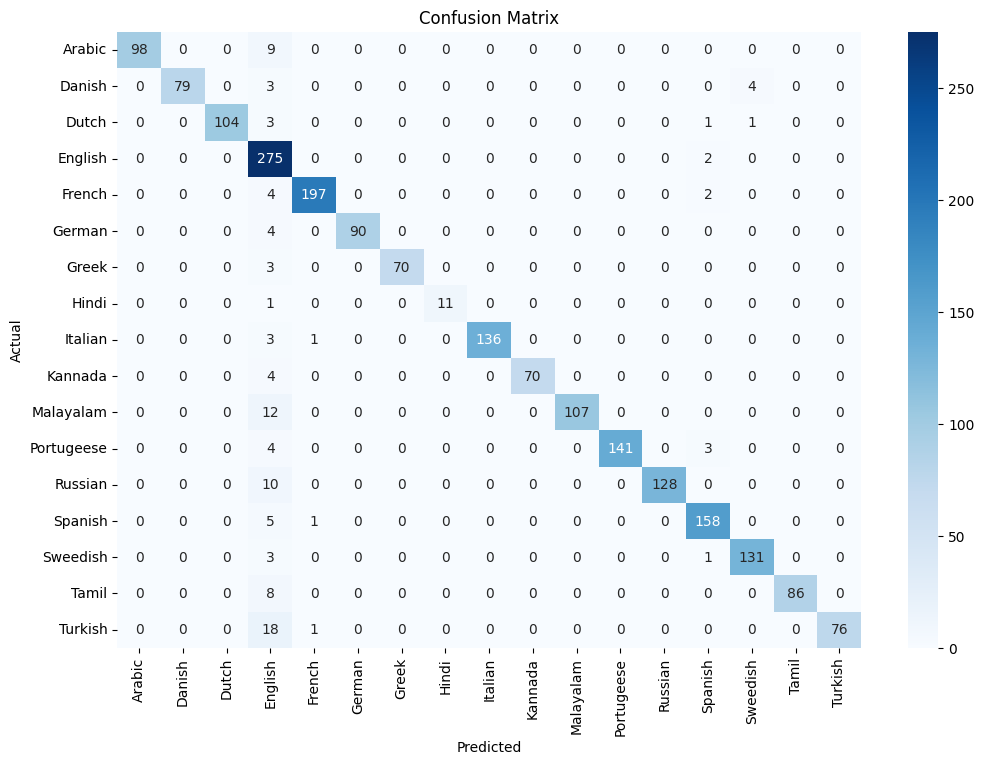

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## ✅ Step 10: Displaying Sample Predictions from the Test Set

Now let's take a look at a few examples from our test set to see how well the model is performing. We'll compare the actual language labels with the ones predicted by the Naive Bayes model. This gives us a qualitative feel for its accuracy on real-world samples.

In [15]:
# Get predictions
y_pred = model.predict(X_test_vec)

# Create a DataFrame to compare predictions
results_df = pd.DataFrame({
    'Original Text': X_test.values,
    'Cleaned Text': X_test,
    'Actual Language': y_test.values,
    'Predicted Language': y_pred
})

# Display a few random samples
results_df.sample(10)


,Original Text,Cleaned Text,Actual Language,Predicted Language
258,featuring no advertisements it is hosted by th...,featuring no advertisements it is hosted by th...,English,English
10052,ಯರದರ ತಪದ ಹಸಯವನನ ಹಳದರ ಅದ ಒಳಳಯದ ಎದ ನವ ಹಳಬಹದ,ಯರದರ ತಪದ ಹಸಯವನನ ಹಳದರ ಅದ ಒಳಳಯದ ಎದ ನವ ಹಳಬಹದ,Kannada,Kannada
5389,te dije que lo harías,te dije que lo harías,Spanish,Spanish
7598,dai,dai,Italian,Italian
3699,la croissance de wikipédia a été favorisée par...,la croissance de wikipédia a été favorisée par...,French,French
4009,ne le prenez pas au sérieux ne soyez pas si co...,ne le prenez pas au sérieux ne soyez pas si co...,French,French
6862,måske talte du i telefon og nogen talte til di...,måske talte du i telefon og nogen talte til di...,Danish,Danish
9915,sie war völlig überrascht wie gutaussehend er ...,sie war völlig überrascht wie gutaussehend er ...,German,German
1401,ജമമ വയൽസ ലറ സങർ എനനവർ ജനവര നണ വകകപഡയ പദധതകക തട...,ജമമ വയൽസ ലറ സങർ എനനവർ ജനവര നണ വകകപഡയ പദധതകക തട...,Malayalam,Malayalam
8555,den hänvisar läsarna till sju andra dokument d...,den hänvisar läsarna till sju andra dokument d...,Sweedish,Sweedish


## Step 11: Saving the Model and Tokenizer

In [16]:
import joblib

# Save the trained model
joblib.dump(model, 'naive_bayes_language_model.pkl')

# Save the TF-IDF vectorizer (tokenizer)
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']